#**Motivation**

My primary motivation is analyzing my current sales on e-commerce. I will use my Trendyol sales data available in the Excel file, featuring columns such as Barcode, Product Name, Model Code, Category, Brand, Color, Size, Gross Sales Quantity, Cancelled Quantity, Cancel Rate, Returned Quantity, Return Rate, Net Sales Quantity, Gross Revenue, Net Revenue, Total Commission Amount, Average Commission Amount, Average Commission Rate, Average Selling Price, Current Selling Price, and Current Stock. By delving into these datasets, I aim to uncover patterns, trends, and correlations that can inform decision-making processes. The analysis will not only provide a comprehensive overview of sales performance but also contribute to optimizing pricing strategies and understanding customer preferences. So, this will be useful for decision-making and enhance overall business efficiency within the context of Trendyol's e-commerce platform.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Veri setini oku
data = pd.read_excel("trendyol_satıs_raporu_2023.xlsx")
data.head()

,Barkod,Ürün Adı,Model Kodu,Kategori,Marka,Renk,Brüt Satış Adedi,İptal Adedi,İptal Oranı,İade Adedi,İade Oranı,Net Satış Adedi,Brüt Ciro,Net Ciro,Toplam Komisyon Tutarı,Ortalama Komisyon Tutarı,Ortalama Komisyon Oranı,Ortalama Satış Fiyatı,Güncel Satış Fiyatı,Güncel Stok
0,ANC05421578,Acil Durum Battaniyesi Ilk Yardım Battaniyesi ...,INC1,İlk Yardım Seti,Ancare,Sarı,2085,49,2.35,15,0.72,2021,57317,55189.0,8143.03,4.03,14.75,27.31,36.90,334
1,trdtltyntrml,Acil Durum Ilk Yardım Battaniyesi Deprem Yanık...,yntrml,İlk Yardım Seti,Outdoor Outlet,Gri,612,12,1.96,0,0.00,600,15524,15170.0,1847.49,3.08,12.18,25.28,25.80,259
2,8699909783148,Acil Durum Ilk Yardım Battaniyesi Deprem Yanık...,SRN126,İlk Yardım Seti,SANOR,Sarı,487,4,0.82,5,1.03,478,14387,14071.0,1996.00,4.18,14.19,29.44,37.99,465
3,ATY2016504428,Acil Durum Termal Battaniye Metalize Isı Yalıt...,P24924S5878,Çadır Uyku Tulumu,Orion Outdoor,Sarı,419,3,0.72,4,0.95,412,11216,11001.0,1113.76,2.70,10.12,26.70,27.49,531
4,SFK-5353,5 Adet Acil Durum Termal Battaniye 210x160 Cm ...,SFK1,İlk Yardım Seti,Şafak Ambalaj,Sarı,236,0,0.00,1,0.42,235,8816,8509.0,1198.72,5.10,14.09,36.21,159.99,9983


In [4]:
# Temel istatistiksel bilgileri görüntüle
print(data.describe())

       Brüt Satış Adedi  İptal Adedi  İptal Oranı  İade Adedi  İade Oranı  \
count         16.000000    16.000000     16.00000   16.000000   16.000000   
mean         309.437500     9.062500      2.16000    3.187500    1.986875   
std          512.663368    19.416381      3.56532    5.153882    5.673261   
min            0.000000     0.000000      0.00000    0.000000    0.000000   
25%           34.750000     0.000000      0.00000    0.000000    0.000000   
50%          120.000000     1.000000      1.01000    0.500000    0.210000   
75%          429.000000     4.250000      2.50750    4.250000    0.970000   
max         2085.000000    66.000000     14.38000   15.000000   23.000000   

       Net Satış Adedi     Brüt Ciro      Net Ciro  Toplam Komisyon Tutarı  \
count         16.00000     16.000000     16.000000                16.00000   
mean         413.37500   9075.937500   8650.720625              1161.79500   
std          621.98273  13690.854629  13252.467680              1954.546

The data is sorted in descending order based on the 'Net Sales Quantity' column, effectively arranging products by their sales quantities per brand. Subsequently, the code prints the brand and sales quantity for each product in the sorted data. Finally, it identifies the brand with the highest total sales quantity and prints both the brand and the corresponding total sales quantity. Overall, this code segment provides insights into the distribution of product sales, emphasizing the brand with the highest overall sales.








In [5]:
# Ürünleri markaya göre satış adedine göre sırala
sorted_data = data.sort_values(by='Net Satış Adedi', ascending=False)

# Marka ve satış adedini yazdır
print("Marka ve Satış Adedi:")
for index, row in sorted_data[['Marka', 'Net Satış Adedi']].iterrows():
    print(f"Marka: {row['Marka']}, Net Satış Adedi: {row['Net Satış Adedi']}")


# En yüksek satış adedine sahip markayı ve toplam satış adedini bul
max_satis_markasi = data.groupby('Marka')['Net Satış Adedi'].sum().idxmax()
toplam_satis_adedi = data.groupby('Marka')['Net Satış Adedi'].sum().max()

print(" ")
print(f"En Yüksek Satış Adedine Sahip Marka: {max_satis_markasi}")
print(f"Toplam Satış Adedi: {toplam_satis_adedi}")


Marka ve Satış Adedi:
Marka: Ancare, Net Satış Adedi: 2021
Marka: Şafak Ambalaj, Net Satış Adedi: 1851
Marka: Outdoor Outlet, Net Satış Adedi: 600
Marka: SANOR, Net Satış Adedi: 478
Marka: Orion Outdoor, Net Satış Adedi: 412
Marka: MİO, Net Satış Adedi: 378
Marka: Şafak Ambalaj, Net Satış Adedi: 235
Marka: Şafak Ambalaj, Net Satış Adedi: 162
Marka: Outdoor Outlet, Net Satış Adedi: 129
Marka: Ancare, Net Satış Adedi: 105
Marka: Webdesepet, Net Satış Adedi: 85
Marka: MİO, Net Satış Adedi: 82
Marka: Trend Stone, Net Satış Adedi: 39
Marka: MİO, Net Satış Adedi: 21
Marka: Vox Art, Net Satış Adedi: 14
Marka: Şafak Ambalaj, Net Satış Adedi: 2
 
En Yüksek Satış Adedine Sahip Marka: Şafak Ambalaj
Toplam Satış Adedi: 2250


In [6]:
# Ürünleri renk ve marka bazında net ciroya göre sırala
sorted_data = data.sort_values(by='Net Ciro', ascending=False)

# Renk ve marka bilgilerini yazdır
print("Renk ve Marka Bilgileri (Net Ciro Göre Sıralı):")
for index, row in sorted_data[['Renk', 'Marka', 'Net Ciro']].iterrows():
    print(f"Renk: {row['Renk']}, Marka: {row['Marka']}, Net Ciro: {row['Net Ciro']}")


# En yüksek net ciroya sahip marka ve rengi bul
max_net_ciro_row = data.loc[data['Net Ciro'].idxmax()]

# Marka ve renk bilgilerini yazdır
max_ciro_marka = max_net_ciro_row['Marka']
max_ciro_renk = max_net_ciro_row['Renk']
max_ciro_miktari = max_net_ciro_row['Net Ciro']
print(" ")
print(f"En Yüksek Net Ciroya Sahip Ürün:")
print(f"Marka: {max_ciro_marka}, Renk: {max_ciro_renk}, Net Ciro: {max_ciro_miktari}")

Renk ve Marka Bilgileri (Net Ciro Göre Sıralı):
Renk: Sarı, Marka: Ancare, Net Ciro: 55189.0
Renk: Gri, Marka: Outdoor Outlet, Net Ciro: 15170.0
Renk: Sarı, Marka: SANOR, Net Ciro: 14071.0
Renk: Sarı, Marka: Orion Outdoor, Net Ciro: 11001.0
Renk: Sarı, Marka: Şafak Ambalaj, Net Ciro: 8509.0
Renk: Gri, Marka: MİO, Net Ciro: 7403.0
Renk: Sarı, Marka: Trend Stone, Net Ciro: 6805.0
Renk: Gri, Marka: Şafak Ambalaj, Net Ciro: 4088.0
Renk: Gri, Marka: Outdoor Outlet, Net Ciro: 3915.0
Renk: Gri, Marka: Şafak Ambalaj, Net Ciro: 3790.0
Renk: Sarı, Marka: Webdesepet, Net Ciro: 2497.0
Renk: Sarı, Marka: Ancare, Net Ciro: 2397.0
Renk: Gri, Marka: MİO, Net Ciro: 1562.0
Renk: Gri, Marka: MİO, Net Ciro: 1533.0
Renk: Gri, Marka: Vox Art, Net Ciro: 281.0
Renk: Gri, Marka: Şafak Ambalaj, Net Ciro: 200.53
 
En Yüksek Net Ciroya Sahip Ürün:
Marka: Ancare, Renk: Sarı, Net Ciro: 55189.0


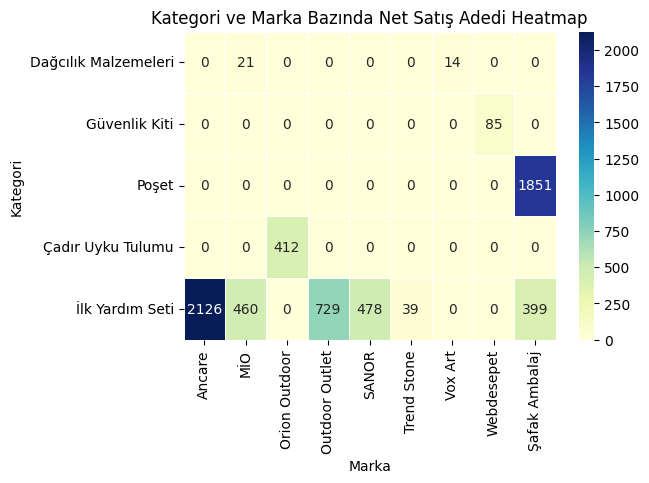

In [7]:
# Kategori ve Marka bazında Net Satış Adedi heatmap'i
heatmap_data = data.pivot_table(index='Kategori', columns='Marka', values='Net Satış Adedi', aggfunc='sum', fill_value=0)

# Heatmap oluştur
plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt='g', linewidths=.5)
plt.title('Kategori ve Marka Bazında Net Satış Adedi Heatmap')
plt.show()

In [8]:
# Markalara göre iade oranlarını hesapla
marka_iade_oranlari = data.groupby('Marka')['İade Oranı'].mean().sort_values(ascending=False)

# En yüksek iade oranına sahip markayı bul
en_yuksek_iade_orani_markasi = marka_iade_oranlari.idxmax()
en_yuksek_iade_orani = marka_iade_oranlari.max()

# Markalara göre iade oranlarını sırala ve yazdır
print("Markalara Göre İade Oranları (Yüksekten Düşüğe):")
print(marka_iade_oranlari)

# En yüksek iade oranına sahip markayı ve oranını yazdır
print(f"\nEn Yüksek İade Oranına Sahip Marka: {en_yuksek_iade_orani_markasi}")
print(f"En Yüksek İade Oranı: {en_yuksek_iade_orani}")

Markalara Göre İade Oranları (Yüksekten Düşüğe):
Marka
Şafak Ambalaj     6.005
Ancare            1.260
MİO               1.090
SANOR             1.030
Orion Outdoor     0.950
Outdoor Outlet    0.000
Trend Stone       0.000
Vox Art           0.000
Webdesepet        0.000
Name: İade Oranı, dtype: float64

En Yüksek İade Oranına Sahip Marka: Şafak Ambalaj
En Yüksek İade Oranı: 6.005


In [9]:
# Markaları ve ürün isimlerini iptal oranına göre sırala
sorted_data = data.sort_values(by='İptal Oranı', ascending=False)

# En yüksek iptal oranına sahip marka ve ürünü bul
en_yuksek_iptal_orani_row = sorted_data.iloc[0]
en_yuksek_iptal_orani_marka = en_yuksek_iptal_orani_row['Marka']
en_yuksek_iptal_orani_urun = en_yuksek_iptal_orani_row['Ürün Adı']
en_yuksek_iptal_orani = en_yuksek_iptal_orani_row['İptal Oranı']

# Markaları ve ürün isimlerini iptal oranlarıyla yazdır
print("Markalar ve Ürün İsimleri İptal Oranına Göre Sıralı:")
for index, row in sorted_data[['Marka', 'Ürün Adı', 'İptal Oranı']].iterrows():
    print(f"Marka: {row['Marka']}, İptal Oranı: {row['İptal Oranı']}")

# En yüksek iptal oranına sahip marka ve ürünü yazdır
print(f"\nEn Yüksek İptal Oranına Sahip Ürün:")
print(f"Marka: {en_yuksek_iptal_orani_marka}, Ürün: {en_yuksek_iptal_orani_urun}, İptal Oranı: {en_yuksek_iptal_orani}")

Markalar ve Ürün İsimleri İptal Oranına Göre Sıralı:
Marka: MİO, İptal Oranı: 14.38
Marka: MİO, İptal Oranı: 4.55
Marka: Ancare, İptal Oranı: 3.6
Marka: Şafak Ambalaj, İptal Oranı: 2.98
Marka: Ancare, İptal Oranı: 2.35
Marka: Şafak Ambalaj, İptal Oranı: 2.0
Marka: Outdoor Outlet, İptal Oranı: 1.96
Marka: MİO, İptal Oranı: 1.2
Marka: SANOR, İptal Oranı: 0.82
Marka: Orion Outdoor, İptal Oranı: 0.72
Marka: Şafak Ambalaj, İptal Oranı: 0.0
Marka: Trend Stone, İptal Oranı: 0.0
Marka: Outdoor Outlet, İptal Oranı: 0.0
Marka: Şafak Ambalaj, İptal Oranı: 0.0
Marka: Webdesepet, İptal Oranı: 0.0
Marka: Vox Art, İptal Oranı: 0.0

En Yüksek İptal Oranına Sahip Ürün:
Marka: MİO, Ürün: Termal Battaniye, İptal Oranı: 14.38


#Data Visualization


<ipython-input-10-cdcd3b512e99>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


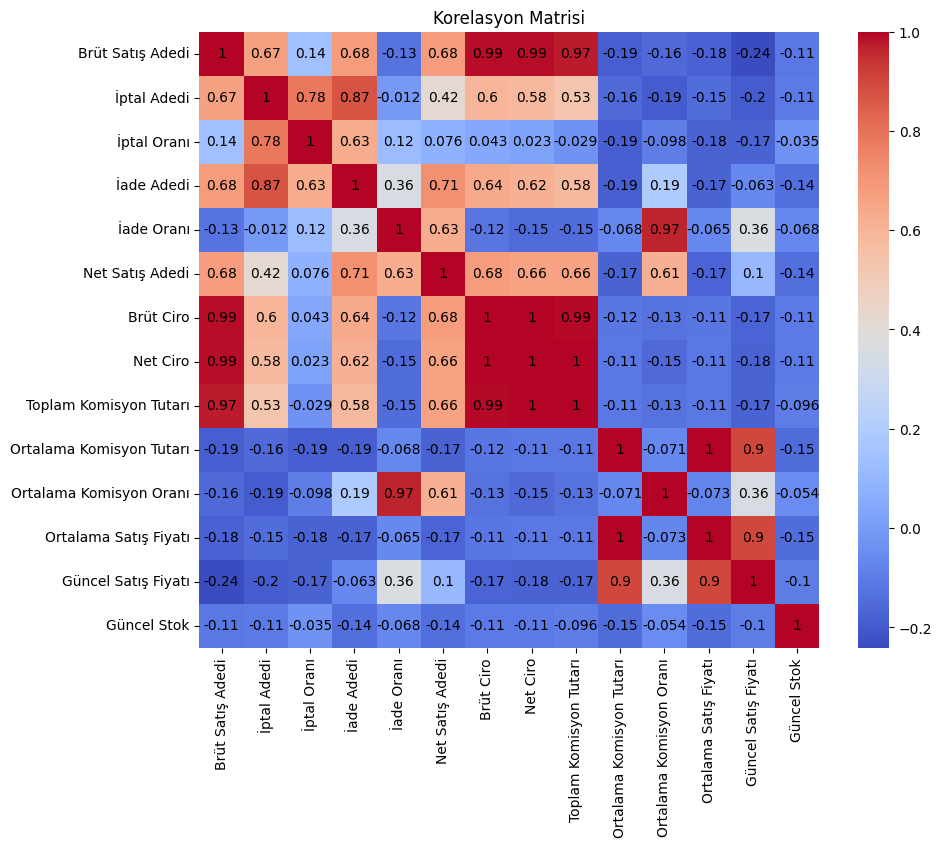

In [10]:
# Korelasyon matrisini oluştur
correlation_matrix = data.corr()

# Heatmap oluştur
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size": 10, "color": 'black'})
plt.title('Korelasyon Matrisi')
plt.show()

The bars are color-coded, with blue representing net sales and red representing return quantities. The resulting visualization allows for a quick comparison of both net sales and return quantities across different brands. The x-axis displays brand names, while the y-axis represents the respective quantities. The legend distinguishes between net sales and return quantities. Overall, this plot provides a visual overview of the sales and return metrics for each brand.

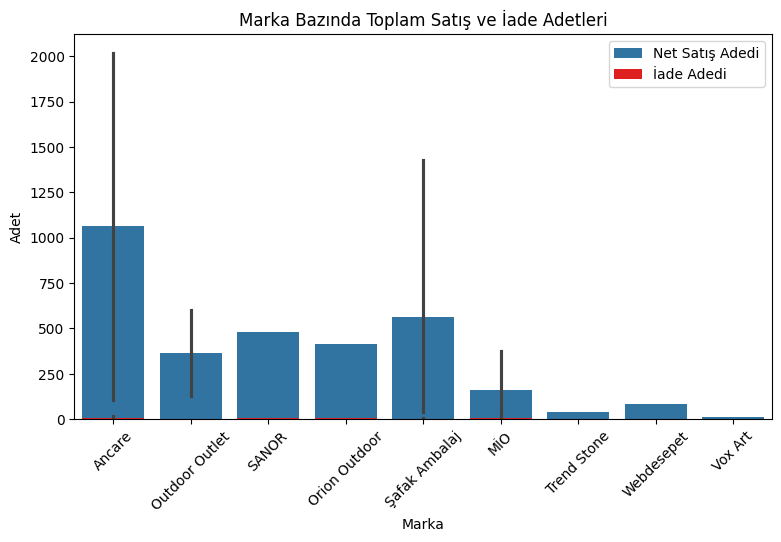

In [11]:
# Marka bazında toplam satış ve iade adetlerini karşılaştır
plt.figure(figsize=(9, 5))
sns.barplot(x='Marka', y='Net Satış Adedi', data=data, label='Net Satış Adedi')
sns.barplot(x='Marka', y='İade Adedi', data=data, label='İade Adedi', color='red')
plt.title('Marka Bazında Toplam Satış ve İade Adetleri')
plt.xlabel('Marka')
plt.ylabel('Adet')
plt.legend()
plt.xticks(rotation=45)
plt.show()

The total net revenue for each color category is then calculated by grouping the data based on colors. Finally, a bar plot is generated, where each bar represents a color category, and the height of the bars corresponds to the total net revenue for that color. The x-axis displays color categories, and the y-axis represents the net revenue. The resulting visualization provides insights into how different colors contribute to the overall net revenue.







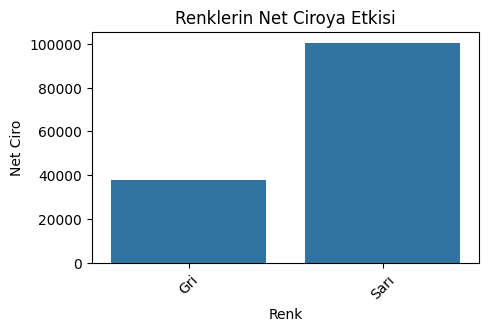

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Renk' ve 'Net Ciro' içeren veri setini oluştur
df = data[['Renk', 'Net Ciro']].dropna()

# Renk kategorilerine göre toplam net ciroyu hesapla
revenue_by_color = df.groupby('Renk')['Net Ciro'].sum().reset_index()

# Çubuk grafik ile görselleştir
plt.figure(figsize=(5, 3))
sns.barplot(x='Renk', y='Net Ciro', data=revenue_by_color)
plt.title('Renklerin Net Ciroya Etkisi')
plt.xlabel('Renk')
plt.ylabel('Net Ciro')
plt.xticks(rotation=45)
plt.show()


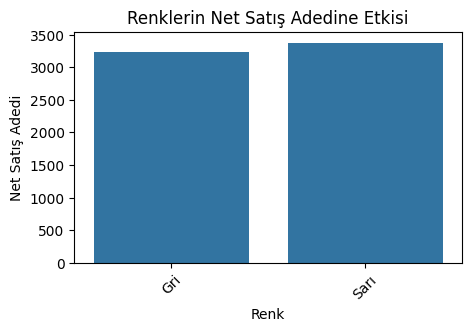

Gri: 3239 adet
Sarı: 3375 adet


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Renk' ve 'Net Satış Adedi' içeren veri setini oluştur
df = data[['Renk', 'Net Satış Adedi']].dropna()

# Renk kategorilerine göre satış adetlerini hesapla
sales_by_color = df.groupby('Renk')['Net Satış Adedi'].sum().reset_index()

# Çubuk grafiği ile görselleştir
plt.figure(figsize=(5, 3))
sns.barplot(x='Renk', y='Net Satış Adedi', data=sales_by_color)
plt.title('Renklerin Net Satış Adedine Etkisi')
plt.xlabel('Renk')
plt.ylabel('Net Satış Adedi')
plt.xticks(rotation=45)
plt.show()
# 'Renk' ve 'Net Satış Adedi' içeren veri setini oluştur
df = data[['Renk', 'Net Satış Adedi']].dropna()

# Renk kategorilerine göre toplam satış adetlerini hesapla
sales_by_color = df.groupby('Renk')['Net Satış Adedi'].sum().reset_index()

# Her renkten tam olarak kaç adet satıldığını görüntüle
for index, row in sales_by_color.iterrows():
    print(f"{row['Renk']}: {int(row['Net Satış Adedi'])} adet")



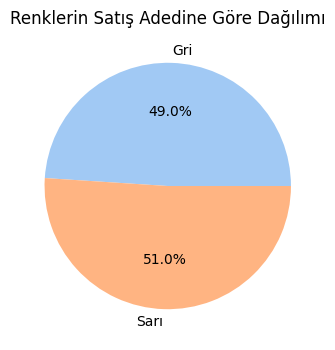

In [14]:
import matplotlib.pyplot as plt

# 'Renk' ve 'Net Satış Adedi' içeren veri setini oluştur
df = data[['Renk', 'Net Satış Adedi']].dropna()

# Renk kategorilerine göre toplam satış adetlerini hesapla
sales_by_color = df.groupby('Renk')['Net Satış Adedi'].sum().reset_index()

# Pie chart oluştur
plt.figure(figsize=(4, 4))
plt.pie(sales_by_color['Net Satış Adedi'], labels=sales_by_color['Renk'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Renklerin Satış Adedine Göre Dağılımı')
plt.show()


<ipython-input-15-a1c89453c722>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")
<ipython-input-15-a1c89453c722>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")


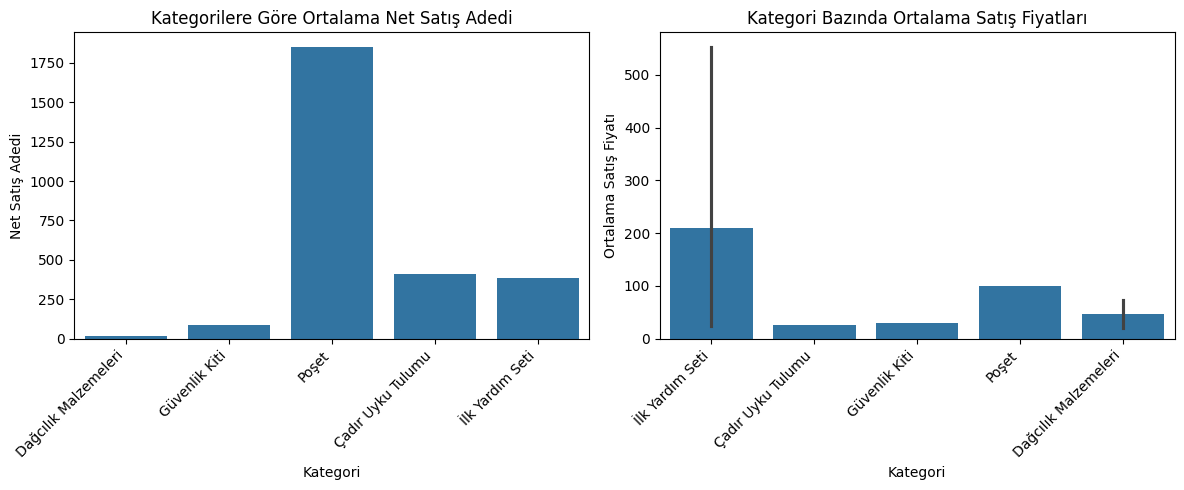

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Kategorilere göre ortalama net satış adedini hesapla
average_sales_by_category = data.groupby('Kategori')['Net Satış Adedi'].mean().reset_index()

# Subplots oluştur
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Çubuk grafiği ile görselleştir - 1. Grafik
sns.barplot(x='Kategori', y='Net Satış Adedi', data=average_sales_by_category, ax=axes[0])
axes[0].set_title('Kategorilere Göre Ortalama Net Satış Adedi')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

# Kategori bazında ortalama satış fiyatlarını görselleştir - 2. Grafik
sns.barplot(x='Kategori', y='Ortalama Satış Fiyatı', data=data, ax=axes[1])
axes[1].set_title('Kategori Bazında Ortalama Satış Fiyatları')
axes[1].set_xlabel('Kategori')
axes[1].set_ylabel('Ortalama Satış Fiyatı')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")

# Subplots düzenle
plt.tight_layout()
plt.show()


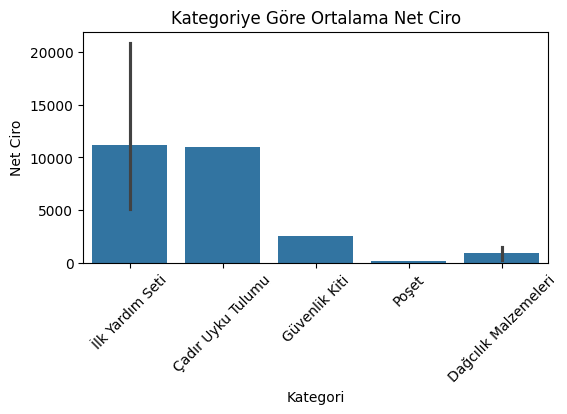

In [16]:

# Kategorilere göre ortalama net ciro gösteren bir çubuk grafiği oluştur
plt.figure(figsize=(6, 3))
sns.barplot(x="Kategori", y="Net Ciro", data=data)
plt.title('Kategoriye Göre Ortalama Net Ciro')
plt.xticks(rotation=45)
plt.show()


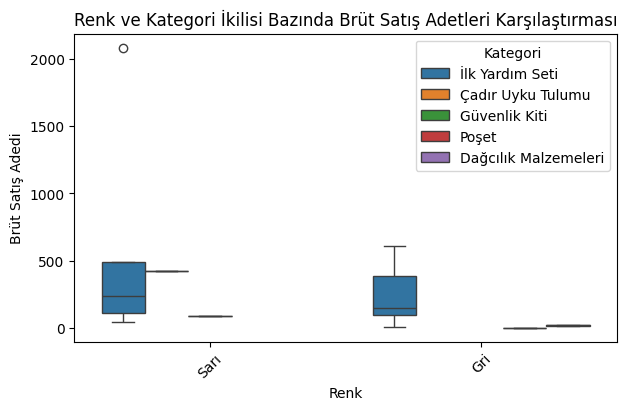

In [17]:
# Renk ve Kategori ikilisi bazında brüt satış adetlerini görselleştir
plt.figure(figsize=(7, 4))
sns.boxplot(x='Renk', y='Brüt Satış Adedi', hue='Kategori', data=data)
plt.title('Renk ve Kategori İkilisi Bazında Brüt Satış Adetleri Karşılaştırması')
plt.xticks(rotation=45)
plt.show()

<ipython-input-18-d99c6892f913>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Marka', y='Ortalama Satış Fiyatı', data=data, ci=None)


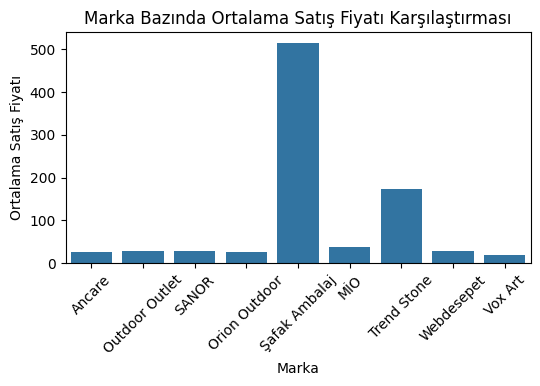

In [18]:
plt.figure(figsize=(6, 3))
sns.barplot(x='Marka', y='Ortalama Satış Fiyatı', data=data, ci=None)
plt.title('Marka Bazında Ortalama Satış Fiyatı Karşılaştırması')
plt.xticks(rotation=45)
plt.show()


<ipython-input-19-340ceaa56ed6>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Marka', y='Net Satış Adedi', data=sales_by_brand, palette='viridis')


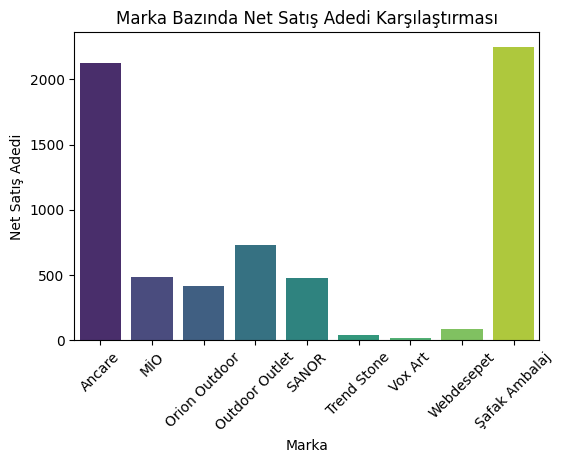

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Marka' ve 'Net Satış Adedi' içeren veri setini oluştur
df = data[['Marka', 'Net Satış Adedi']].dropna()

# Marka bazında toplam satış adetlerini hesapla
sales_by_brand = df.groupby('Marka')['Net Satış Adedi'].sum().reset_index()

# Çubuk grafik ile görselleştir
plt.figure(figsize=(6, 4))
sns.barplot(x='Marka', y='Net Satış Adedi', data=sales_by_brand, palette='viridis')
plt.title('Marka Bazında Net Satış Adedi Karşılaştırması')
plt.xlabel('Marka')
plt.ylabel('Net Satış Adedi')
plt.xticks(rotation=45)
plt.show()


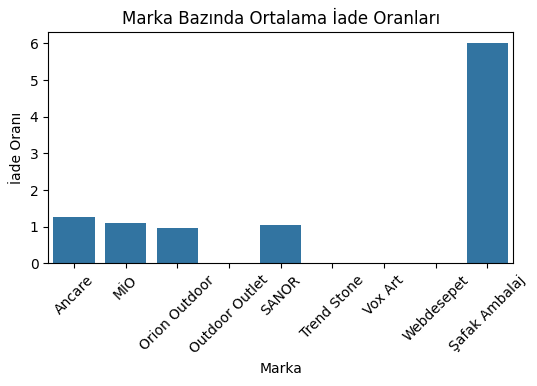

In [20]:
# Marka bazında ortalama iade oranlarını hesapla
average_return_rate_by_brand = data.groupby('Marka')['İade Oranı'].mean().reset_index()

# Çubuk grafiği ile görselleştir
plt.figure(figsize=(6, 3))
sns.barplot(x='Marka', y='İade Oranı', data=average_return_rate_by_brand)
plt.title('Marka Bazında Ortalama İade Oranları')
plt.xticks(rotation=45)
plt.show()

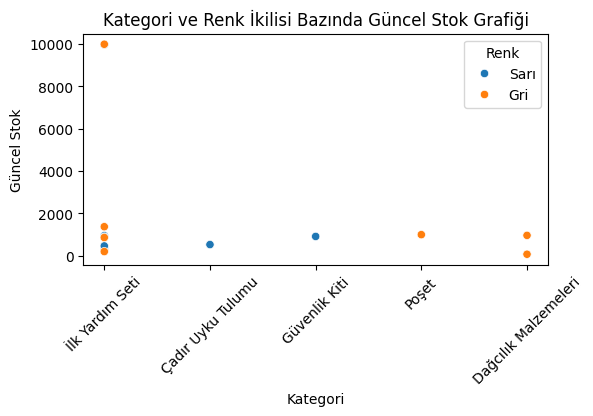

In [21]:
plt.figure(figsize=(6, 3))
sns.scatterplot(x='Kategori', y='Güncel Stok', hue='Renk', data=data)
plt.title('Kategori ve Renk İkilisi Bazında Güncel Stok Grafiği')
plt.xticks(rotation=45)
plt.show()

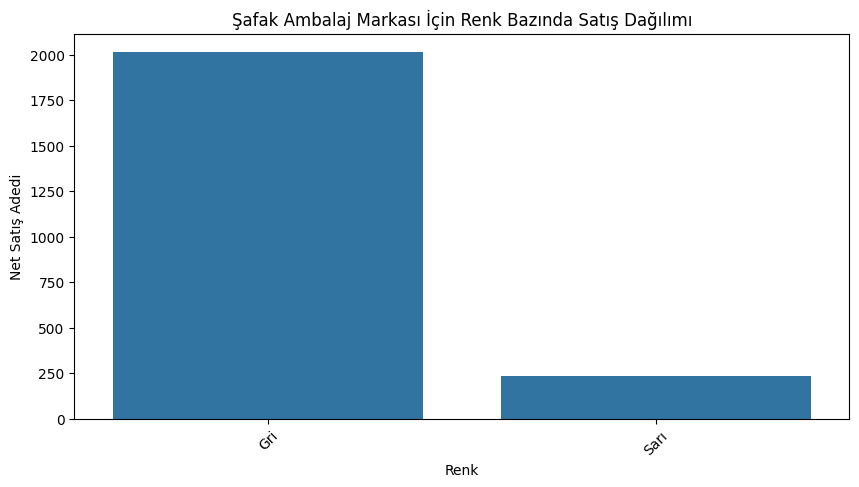

In [23]:
# Belirli bir marka için renk bazında satış dağılımını incele
selected_brand = 'Şafak Ambalaj'  # İlgili marka adını girin
brand_sales_by_color = data[data['Marka'] == selected_brand].groupby('Renk')['Net Satış Adedi'].sum().reset_index()

# Renk bazında satışları görselleştir
plt.figure(figsize=(10, 5))
sns.barplot(x='Renk', y='Net Satış Adedi', data=brand_sales_by_color)
plt.title(f'{selected_brand} Markası İçin Renk Bazında Satış Dağılımı')
plt.xlabel('Renk')
plt.ylabel('Net Satış Adedi')
plt.xticks(rotation=45)
plt.show()

#**Regression**

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Eksik değerleri temizle
data = data.dropna()

# Bağımsız değişkenler (X) ve bağımlı değişken (y) seçimi
X = data[['Net Ciro', 'Ortalama Satış Fiyatı']]
y = data['Net Satış Adedi']

# Veriyi eğitim ve test setlerine bölelim
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model oluşturup eğitelim
model = LinearRegression()
model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapalım
y_pred = model.predict(X_test)

# Hata ölçümü yapalım (örneğin, ortalama karesel hata)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 1354082.0482331477


Mean Squared Error: 46801425.99393696


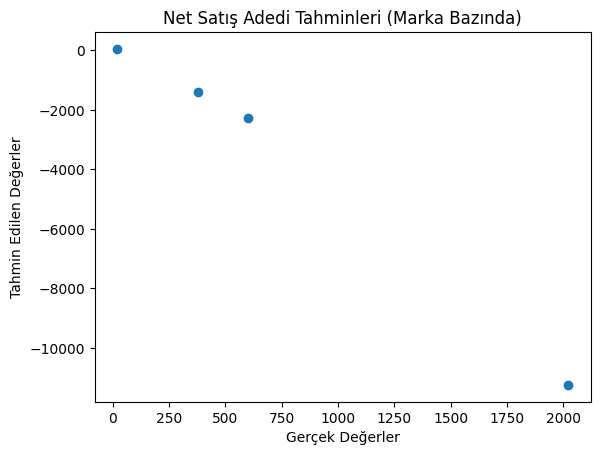

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


# Bağımsız değişkenleri (X) ve bağımlı değişkeni (y) seç
X = data[['Brüt Ciro','Ortalama Satış Fiyatı', 'Marka']]
y = data['Net Satış Adedi']

# Eğitim ve test veri setlerini oluştur
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Marka sütununu one-hot encoding yap
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), ['Marka'])],
    remainder='passthrough'
)

# Modeli oluştur ve eğit
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

model.fit(X_train, y_train)

# Test veri seti üzerinde tahmin yap
y_pred = model.predict(X_test)

# Model performansını değerlendir
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Tahminleri görselleştir
plt.scatter(y_test, y_pred)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahmin Edilen Değerler')
plt.title('Net Satış Adedi Tahminleri (Marka Bazında)')
plt.show()



# **Hypothesis Tests**

In [26]:
from scipy.stats import pearsonr

# H0: İki değişken arasında korelasyon yoktur.
# H1: İki değişken arasında korelasyon vardır.

# Örnek: İki değişken seçilmiş olsun, 'Komisyon_Tutari' ve 'Guncel_Satis_Fiyati'
komisyon_tutari = data['Toplam Komisyon Tutarı'].dropna()
guncel_satis_fiyati = data['Güncel Satış Fiyatı'].dropna()

# Pearson Korelasyon Testi uygula
corr_coefficient, p_value = pearsonr(komisyon_tutari, guncel_satis_fiyati)

print(f"Pearson Korelasyon Katsayısı: {corr_coefficient}")
print(f"P-değeri: {p_value}")

if p_value < 0.05:
    print("H0 reddedildi. Komisyon Tutarı ile Güncel Satış Fiyatı arasında istatistiksel olarak anlamlı bir korelasyon vardır.")
else:
    print("H0 kabul edildi. Komisyon Tutarı ile Güncel Satış Fiyatı arasında istatistiksel olarak anlamlı bir korelasyon yoktur.")


Pearson Korelasyon Katsayısı: -0.17335633878355025
P-değeri: 0.5208300795263241
H0 kabul edildi. Komisyon Tutarı ile Güncel Satış Fiyatı arasında istatistiksel olarak anlamlı bir korelasyon yoktur.


In [27]:
from scipy.stats import kruskal

# H0: Renkler arasında iade oranları arasında istatistiksel olarak anlamlı bir fark yoktur.
# H1: Renkler arasında iade oranları arasında istatistiksel olarak anlamlı bir fark vardır.

# Örnek: İki renk seçilmiş olsun,
renk_A = data[data['Renk'] == 'Sarı']['İade Oranı']
renk_B = data[data['Renk'] == 'Gri']['İade Oranı']

# Kruskal-Wallis testi uygula
stat, p_value = kruskal(renk_A, renk_B)

print(f"Kruskal-Wallis Test İstatistiği: {stat}")
print(f"P-değeri: {p_value}")

if p_value < 0.05:
    print("H0 reddedildi. Renkler arasında iade oranları arasında istatistiksel olarak anlamlı bir fark vardır.")
else:
    print("H0 kabul edildi. Renkler arasında iade oranları arasında istatistiksel olarak anlamlı bir fark yoktur.")

Kruskal-Wallis Test İstatistiği: 0.9236177692553539
P-değeri: 0.33652685375604
H0 kabul edildi. Renkler arasında iade oranları arasında istatistiksel olarak anlamlı bir fark yoktur.


In [28]:
from scipy.stats import pearsonr

# H0: İki değişken arasında korelasyon yoktur.
# H1: İki değişken arasında korelasyon vardır.

# Örnek: İki değişken seçilmiş olsun, 'Net_Ciro' ve 'Toplam_Komisyon_Tutari'
net_ciro = data['Net Ciro'].dropna()
toplam_komisyon_tutari = data['Toplam Komisyon Tutarı'].dropna()

# Pearson Korelasyon Testi uygula
corr_coefficient, p_value = pearsonr(net_ciro, toplam_komisyon_tutari)

print(f"Pearson Korelasyon Katsayısı: {corr_coefficient}")
print(f"P-değeri: {p_value}")

if p_value < 0.05:
    print("H0 reddedildi. Net Ciro ile Toplam Komisyon Tutarı arasında istatistiksel olarak anlamlı bir korelasyon vardır.")
else:
    print("H0 kabul edildi. Net Ciro ile Toplam Komisyon Tutarı arasında istatistiksel olarak anlamlı bir korelasyon yoktur.")


Pearson Korelasyon Katsayısı: 0.9952363739497616
P-değeri: 1.4738900314096715e-15
H0 reddedildi. Net Ciro ile Toplam Komisyon Tutarı arasında istatistiksel olarak anlamlı bir korelasyon vardır.


In [29]:
from scipy.stats import f_oneway

# H0: Markalar arasında satış fiyatları arasında istatistiksel olarak anlamlı bir fark yoktur.
# H1: Markalar arasında satış fiyatları arasında istatistiksel olarak anlamlı bir fark vardır.

# Örnek: İki marka seçilmiş olsun, 'Marka_A' ve 'Marka_B'
marka_A = data[data['Marka'] == 'Şafak Ambalaj']['Güncel Satış Fiyatı']
marka_B = data[data['Marka'] == 'Ancare']['Güncel Satış Fiyatı']

# ANOVA testi uygula
stat, p_value = f_oneway(marka_A, marka_B)

print(f"ANOVA Test İstatistiği: {stat}")
print(f"P-değeri: {p_value}")

if p_value < 0.05:
    print("H0 reddedildi. Markalar arasında satış fiyatları arasında istatistiksel olarak anlamlı bir fark vardır.")
else:
    print("H0 kabul edildi. Markalar arasında satış fiyatları arasında istatistiksel olarak anlamlı bir fark yoktur.")


ANOVA Test İstatistiği: 1.426824577311679
P-değeri: 0.29827042292178674
H0 kabul edildi. Markalar arasında satış fiyatları arasında istatistiksel olarak anlamlı bir fark yoktur.


In [30]:
from scipy.stats import ttest_ind

# H0: İptal Adedi ile Net Ciro arasında istatistiksel olarak anlamlı bir fark yoktur.
# H1: İptal Adedi ile Net Ciro arasında istatistiksel olarak anlamlı bir fark vardır.

# Örnek: İki örneklem seçilmiş olsun, 'Iptal_Adedi' ve 'Net_Ciro'
iptal_adedi = data['İptal Adedi'].sample(frac=1, random_state=42)
net_ciro = data['Net Ciro'].sample(frac=1, random_state=42)

# İki Örneklem T-Testi uygula
stat, p_value = ttest_ind(iptal_adedi, net_ciro, equal_var=False)

print(f"T-Test İstatistiği: {stat}")
print(f"P-değeri: {p_value}")

if p_value < 0.05:
    print("H0 reddedildi. İptal Adedi ile Net Ciro arasında istatistiksel olarak anlamlı bir fark vardır.")
else:
    print("H0 kabul edildi. İptal Adedi ile Net Ciro arasında istatistiksel olarak anlamlı bir fark yoktur.")


T-Test İstatistiği: -2.6083138805659782
P-değeri: 0.019768943218710273
H0 reddedildi. İptal Adedi ile Net Ciro arasında istatistiksel olarak anlamlı bir fark vardır.


In [31]:
from scipy.stats import f_oneway

# H0: Markalar arasında satış fiyatları arasında istatistiksel olarak anlamlı bir fark yoktur.
# H1: Markalar arasında satış fiyatları arasında istatistiksel olarak anlamlı bir fark vardır.

# Örnek: İki marka seçilmiş olsun, 'Marka_A' ve 'Marka_B'
marka_A = data[data['Marka'] == 'Şafak Ambalaj']['Güncel Satış Fiyatı']
marka_B = data[data['Marka'] == 'Ancare']['Güncel Satış Fiyatı']

# ANOVA testi uygula
stat, p_value = f_oneway(marka_A, marka_B)

print(f"ANOVA Test İstatistiği: {stat}")
print(f"P-değeri: {p_value}")

if p_value < 0.05:
    print("H0 reddedildi. Markalar arasında satış fiyatları arasında istatistiksel olarak anlamlı bir fark vardır.")
else:
    print("H0 kabul edildi. Markalar arasında satış fiyatları arasında istatistiksel olarak anlamlı bir fark yoktur.")


ANOVA Test İstatistiği: 1.426824577311679
P-değeri: 0.29827042292178674
H0 kabul edildi. Markalar arasında satış fiyatları arasında istatistiksel olarak anlamlı bir fark yoktur.


In [32]:
from scipy.stats import ttest_ind

# H0: İki farklı iade oranı grupları arasında satış adedi ortalamaları arasında istatistiksel olarak anlamlı bir fark yoktur.
# H1: İki farklı iade oranı grupları arasında satış adedi ortalamaları arasında istatistiksel olarak anlamlı bir fark vardır.

# Örnek: İki iade oranı grup seçilmiş olsun, 'Iade_Orani_Yuksek' ve 'Iade_Orani_Dusuk'
iade_orani_yuksek_satis_adedi = data[data['İade Oranı'] > 0.05]['Net Satış Adedi'].dropna()
iade_orani_dusuk_satis_adedi = data[data['İade Oranı'] <= 0.05]['Net Satış Adedi'].dropna()

# Bağımsız İki Örneklem T-Testi uygula
stat, p_value = ttest_ind(iade_orani_yuksek_satis_adedi, iade_orani_dusuk_satis_adedi)

print(f"T-Test İstatistiği: {stat}")
print(f"P-değeri: {p_value}")

if p_value < 0.05:
    print("H0 reddedildi. İki farklı iade oranı grubu arasında satış adedi ortalamaları arasında istatistiksel olarak anlamlı bir fark vardır.")
else:
    print("H0 kabul edildi. İki farklı iade oranı grubu arasında satış adedi ortalamaları arasında istatistiksel olarak anlamlı bir fark yoktur.")


T-Test İstatistiği: 2.0731714410078617
P-değeri: 0.05709263834377552
H0 kabul edildi. İki farklı iade oranı grubu arasında satış adedi ortalamaları arasında istatistiksel olarak anlamlı bir fark yoktur.


In [33]:
from scipy.stats import pearsonr

# H0: İki değişken arasında korelasyon yoktur.
# H1: İki değişken arasında korelasyon vardır.

# Örnek: İki değişken seçilmiş olsun, 'İade_Orani' ve 'Net_Ciro'
iade_orani = data['İade Oranı'].dropna()
net_ciro = data['Net Ciro'].dropna()

# Pearson Korelasyon Testi uygula
corr_coefficient, p_value = pearsonr(iade_orani, net_ciro)

print(f"Pearson Korelasyon Katsayısı: {corr_coefficient}")
print(f"P-değeri: {p_value}")

if p_value < 0.05:
    print("H0 reddedildi. İade Oranı ile Net Ciro arasında istatistiksel olarak anlamlı bir korelasyon vardır.")
else:
    print("H0 kabul edildi. İade Oranı ile Net Ciro arasında istatistiksel olarak anlamlı bir korelasyon yoktur.")


Pearson Korelasyon Katsayısı: -0.1517729471262061
P-değeri: 0.5747202795395565
H0 kabul edildi. İade Oranı ile Net Ciro arasında istatistiksel olarak anlamlı bir korelasyon yoktur.


In [34]:
from scipy.stats import mannwhitneyu

# H0: İki kategorik değişken arasında medyan farkı yoktur.
# H1: İki kategorik değişken arasında medyan farkı vardır.

# Örnek: İki kategorik değişken seçilmiş olsun, 'Kategori_1' ve 'Kategori_2'
kategori_1 = data[data['Kategori'] == 'İlk Yardım Seti']['Net Satış Adedi'].sample(frac=1, random_state=42)
kategori_2 = data[data['Kategori'] == 'Çadır Uyku Tulumu']['Net Satış Adedi'].sample(frac=1, random_state=42)

# Mann-Whitney U Testi uygula
stat, p_value = mannwhitneyu(kategori_1, kategori_2)

print(f"Mann-Whitney U Test İstatistiği: {stat}")
print(f"P-değeri: {p_value}")

if p_value < 0.05:
    print("H0 reddedildi. İki kategorik değişken arasında medyan farkı vardır.")
else:
    print("H0 kabul edildi. İki kategorik değişken arasında medyan farkı yoktur.")


Mann-Whitney U Test İstatistiği: 3.0
P-değeri: 0.6666666666666666
H0 kabul edildi. İki kategorik değişken arasında medyan farkı yoktur.


In [35]:
from scipy.stats import ttest_ind

# H0: Ortalama satış fiyatı ile güncel satış fiyatı arasında istatistiksel olarak anlamlı bir fark yoktur.
# H1: Ortalama satış fiyatı ile güncel satış fiyatı arasında istatistiksel olarak anlamlı bir fark vardır.

# Örnek: İki örneklem seçilmiş olsun, 'Ortalama_Satis_Fiyati' ve 'Guncel_Satis_Fiyati'
ortalama_satis_fiyati = data['Ortalama Satış Fiyatı'].sample(frac=1, random_state=42)
guncel_satis_fiyati = data['Güncel Satış Fiyatı'].sample(frac=1, random_state=42)

# İki Örneklem T-Testi uygula
stat, p_value = ttest_ind(ortalama_satis_fiyati, guncel_satis_fiyati)

print(f"T-Test İstatistiği: {stat}")
print(f"P-değeri: {p_value}")

if p_value < 0.05:
    print("H0 reddedildi. Ortalama satış fiyatı ile güncel satış fiyatı arasında istatistiksel olarak anlamlı bir fark vardır.")
else:
    print("H0 kabul edildi. Ortalama satış fiyatı ile güncel satış fiyatı arasında istatistiksel olarak anlamlı bir fark yoktur.")


T-Test İstatistiği: -0.4172509000818636
P-değeri: 0.6794658544590149
H0 kabul edildi. Ortalama satış fiyatı ile güncel satış fiyatı arasında istatistiksel olarak anlamlı bir fark yoktur.


In [36]:
from scipy.stats import ttest_ind

# H0: Ortalama satış fiyatı ile iade oranı arasında istatistiksel olarak anlamlı bir fark yoktur.
# H1: Ortalama satış fiyatı ile iade oranı arasında istatistiksel olarak anlamlı bir fark vardır.

# Örnek: İki örneklem seçilmiş olsun, 'Ortalama_Satis_Fiyati' ve 'Iade_Orani'
ortalama_satis_fiyati = data['Ortalama Satış Fiyatı'].sample(frac=1, random_state=42)
iade_orani = data['İade Oranı'].sample(frac=1, random_state=42)

# İki Örneklem T-Testi uygula
stat, p_value = ttest_ind(ortalama_satis_fiyati, iade_orani, equal_var=False)

print(f"T-Test İstatistiği: {stat}")
print(f"P-değeri: {p_value}")

if p_value < 0.05:
    print("H0 reddedildi. Ortalama satış fiyatı ile iade oranı arasında istatistiksel olarak anlamlı bir fark vardır.")
else:
    print("H0 kabul edildi. Ortalama satış fiyatı ile iade oranı arasında istatistiksel olarak anlamlı bir fark yoktur.")


T-Test İstatistiği: 1.3571054634094462
P-değeri: 0.19481285999018721
H0 kabul edildi. Ortalama satış fiyatı ile iade oranı arasında istatistiksel olarak anlamlı bir fark yoktur.


In [37]:
from scipy.stats import f_oneway

# H0: Marka bazında iptal oranları arasında istatistiksel olarak anlamlı bir fark yoktur.
# H1: Marka bazında iptal oranları arasında istatistiksel olarak anlamlı bir fark vardır.

# Örnek: İki marka seçilmiş olsun, 'Marka_A' ve 'Marka_B'
marka_A_iptal_orani = data[data['Marka'] == 'Ancare']['İptal Oranı'].sample(frac=1, random_state=42)
marka_B_iptal_orani = data[data['Marka'] == 'Şafak Ambalaj']['İptal Oranı'].sample(frac=1, random_state=42)

# ANOVA (One-way Analysis of Variance) testi uygula
stat, p_value = f_oneway(marka_A_iptal_orani, marka_B_iptal_orani)

print(f"ANOVA İstatistiği: {stat}")
print(f"P-değeri: {p_value}")

if p_value < 0.05:
    print("H0 reddedildi. Marka bazında iptal oranları arasında istatistiksel olarak anlamlı bir fark vardır.")
else:
    print("H0 kabul edildi. Marka bazında iptal oranları arasında istatistiksel olarak anlamlı bir fark yoktur.")


ANOVA İstatistiği: 2.139251674696723
P-değeri: 0.21739564227631974
H0 kabul edildi. Marka bazında iptal oranları arasında istatistiksel olarak anlamlı bir fark yoktur.
